In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv")
df_test=pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv")

In [4]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
# Check for rows with all the features having the same values
same_values_rows = df[df.duplicated(keep=False) & df.apply(lambda x: x.nunique() == 1, axis=1)]

# Print the rows with all the features having the same values
print("Rows with Same Values in All Features:")
print(same_values_rows)


Rows with Same Values in All Features:
Empty DataFrame
Columns: [id, Gender, Age, Height, Weight, family_history_with_overweight, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS, NObeyesdad]
Index: []


In [6]:
#FAVC: Frequency of consumption of high-caloric food.
#FCVC: Frequency of consumption of vegetables.
#NCP: Number of main meals per day.
#CAEC: Consumption of food between meals.
#SMOKE: Whether the individual smokes or not.
#CH2O: Daily water intake.
#SCC: Calories consumption monitoring.
#FAF: Physical activity frequency.
#TUE: Time spent on sedentary activities.
#CALC: Alcohol consumption.
#MTRANS: Mode of transportation.
#NObeyesdad: Classification of obesity level (target variable).

In [7]:
#| Column                            | Full Form                             | Description                                                                  |
#|-----------------------------------|---------------------------------------|------------------------------------------------------------------------------|
#| 'id'                              | id                                    | Unique for each person(row)                                                 |
#| 'Gender'                          | Gender                                | person's Gender                                                              |
#| 'Age'                             | Age                                   | Dtype is float. Age is between 14 years to 61 years                          |
#| 'Height'                          | Height                                | Height is in meter it's between 1.45m to 1.98m                               |
#| 'Weight'                          | Weight                                | Weight is between 39 to 165. I think it is in KG.                            |
#| 'family_history_with_overweight'  | family history with overweight        | yes or no question                                                           |
#| 'FAVC'                            | Frequent consumption of high calorie food | it's yes or no question. I think the question they asked is do you consume high calorie food |
#| 'FCVC'                            | Frequency of consumption of vegetables | Similar to FAVC. This is also a yes or no question                            |
#| 'NCP'                             | Number of main meals                  | Dtype is float, NCP is between 1 & 4. I think it should be 1,2,3,4 but our data is synthetic so it's taking float values |
#| 'CAEC'                            | Consumption of food between meals     | takes 4 values Sometimes, Frequently, no & Always                           |
#| 'SMOKE'                           | Smoke                                 | yes or no question. I think the question is "Do you smoke?"                 |
#| 'CH2O'                            | Consumption of water daily            | CH2O takes values between 1 & 3. again it's given as float may be because of synthetic data. it's values should be 1,2 or 3 |
#| 'SCC'                             | Calories consumption monitoring       | yes or no question                                                           |
#| 'FAF'                             | Physical activity frequency           | FAF is between 0 to 3, 0 means no physical activity and 3 means high workout. and again, in our data it's given as float |
#| 'TUE'                             | Time using technology devices         | TUE is between 0 to 2. I think the question will be "How long have you been using technology devices to track your health?" in our data it's given as float |
#| 'CALC'                            | Consumption of alcohol                | Takes 3 values: Sometimes, no, Frequently                                   |
#| 'MTRANS'                          | Transportation used                   | MTRANS takes 5 values Public_Transportation, Automobile, Walking, Motorbike, & Bike |
#| 'NObeyesdad'                      | TARGET                                | This is our target, takes 7 values, and in this comp. we have to give the class name (Not the Probability, which is the case in most comp.) |

# **EDA**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [9]:
df.head(10).style.background_gradient(cmap = 'copper')

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
6,6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
8,8,Male,17.000000,1.700000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,3.000000,yes,1.000000,1.000000,no,Public_Transportation,Overweight_Level_I
9,9,Female,26.000000,1.638836,111.275646,yes,yes,3.000000,3.000000,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III


In [10]:
df.describe().style.background_gradient(cmap = 'ocean')

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.500000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.462780,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.000000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.250000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.500000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.750000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.000000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [11]:
df.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [12]:
df.nunique()

id                                20758
Gender                                2
Age                                1703
Height                             1833
Weight                             1979
family_history_with_overweight        2
FAVC                                  2
FCVC                                934
NCP                                 689
CAEC                                  4
SMOKE                                 2
CH2O                               1506
SCC                                   2
FAF                                1360
TUE                                1297
CALC                                  3
MTRANS                                5
NObeyesdad                            7
dtype: int64

In [13]:
df = df.rename(columns={'NObeyesdad': 'Obesity_Level'})

# **PLOTS**

In [14]:
categoricals = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS", "Obesity_Level" ]

numericals = []
for col in df.columns:
    if col not in categoricals:
        numericals.append(col)

print("Numerical columns:")
print(numericals)
print("\nCategorical columns:")
print(categoricals)

Numerical columns:
['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

Categorical columns:
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'Obesity_Level']


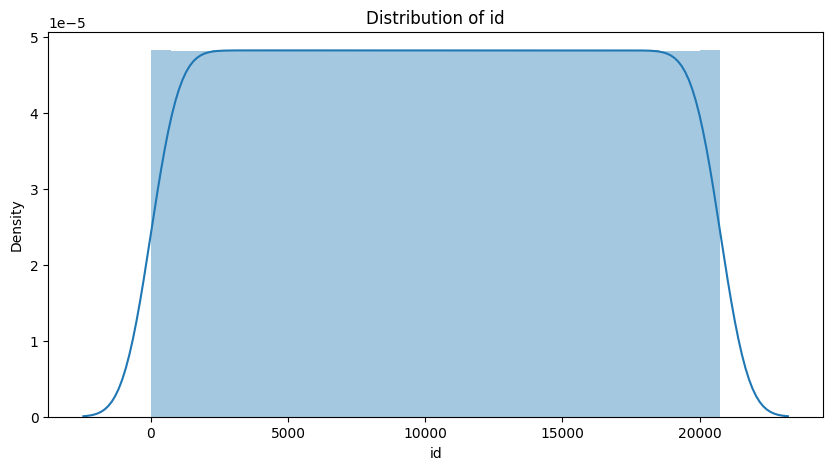

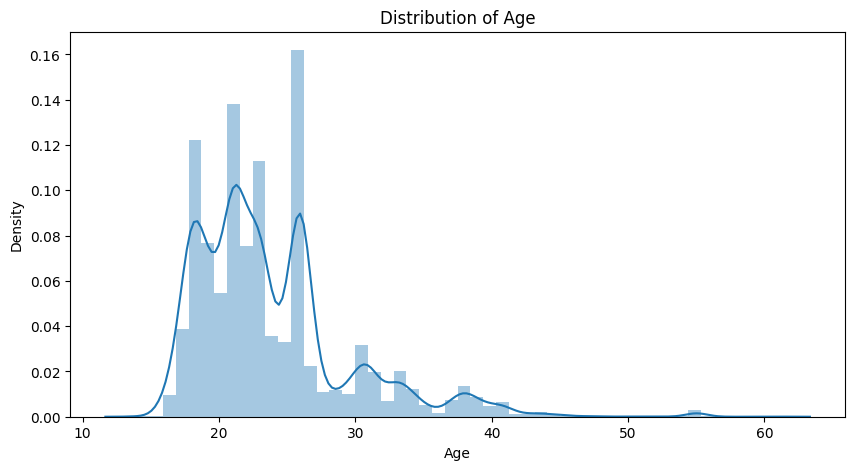

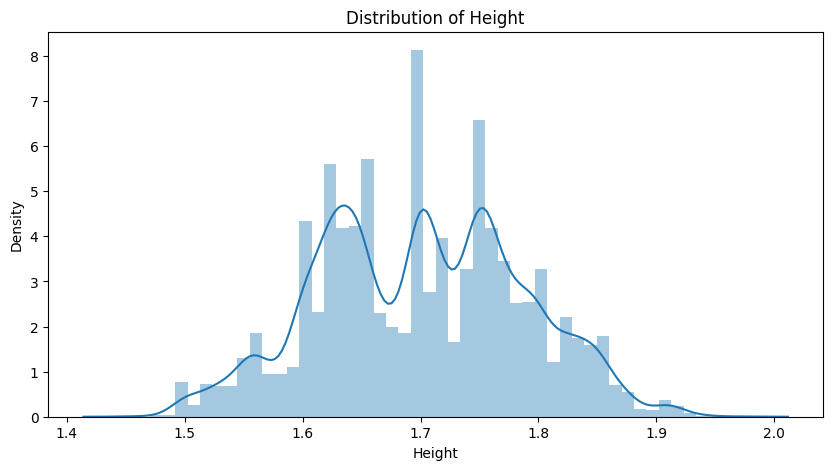

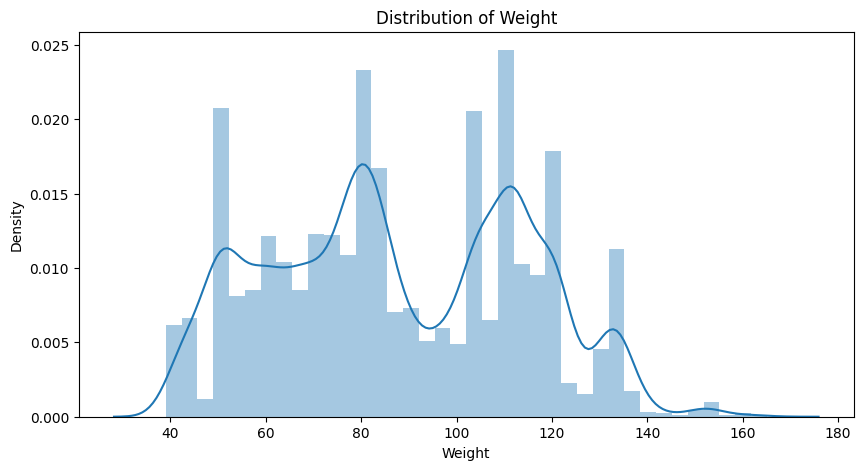

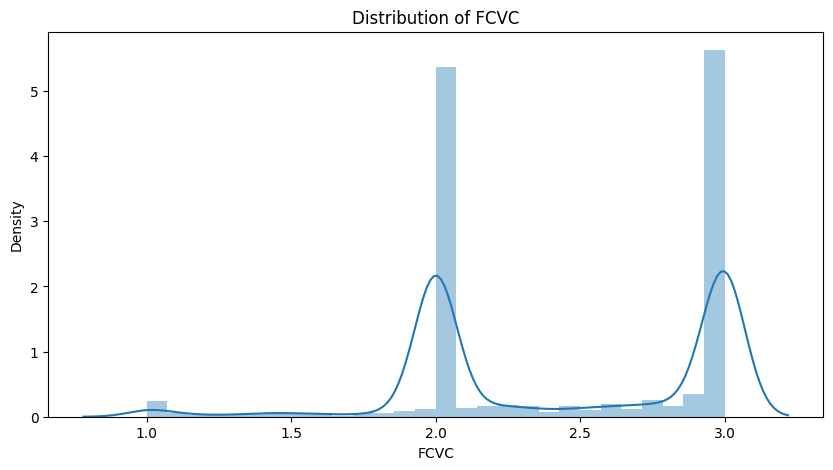

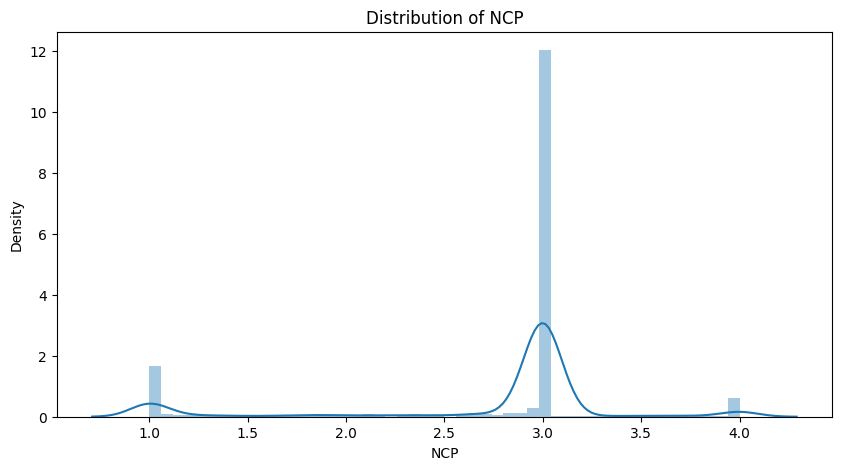

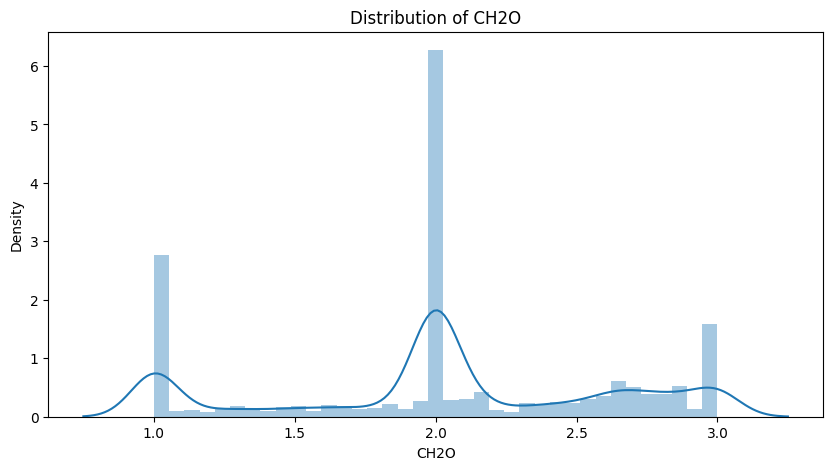

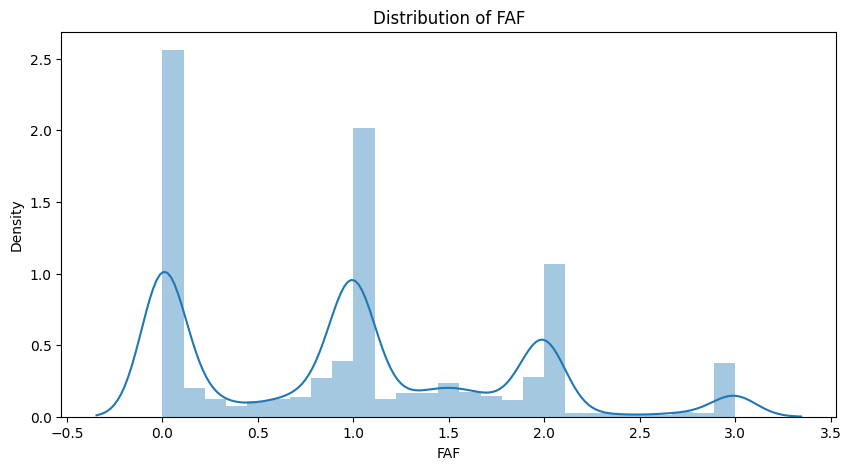

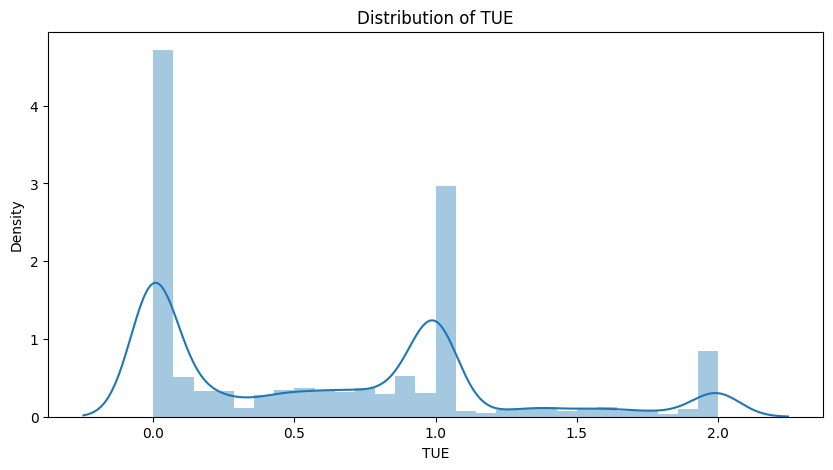

In [15]:
for col in numericals:
    plt.figure(figsize=(10, 5))
    plt.title(f"Distribution of {col}")
    sns.distplot(df[col])
    plt.show()

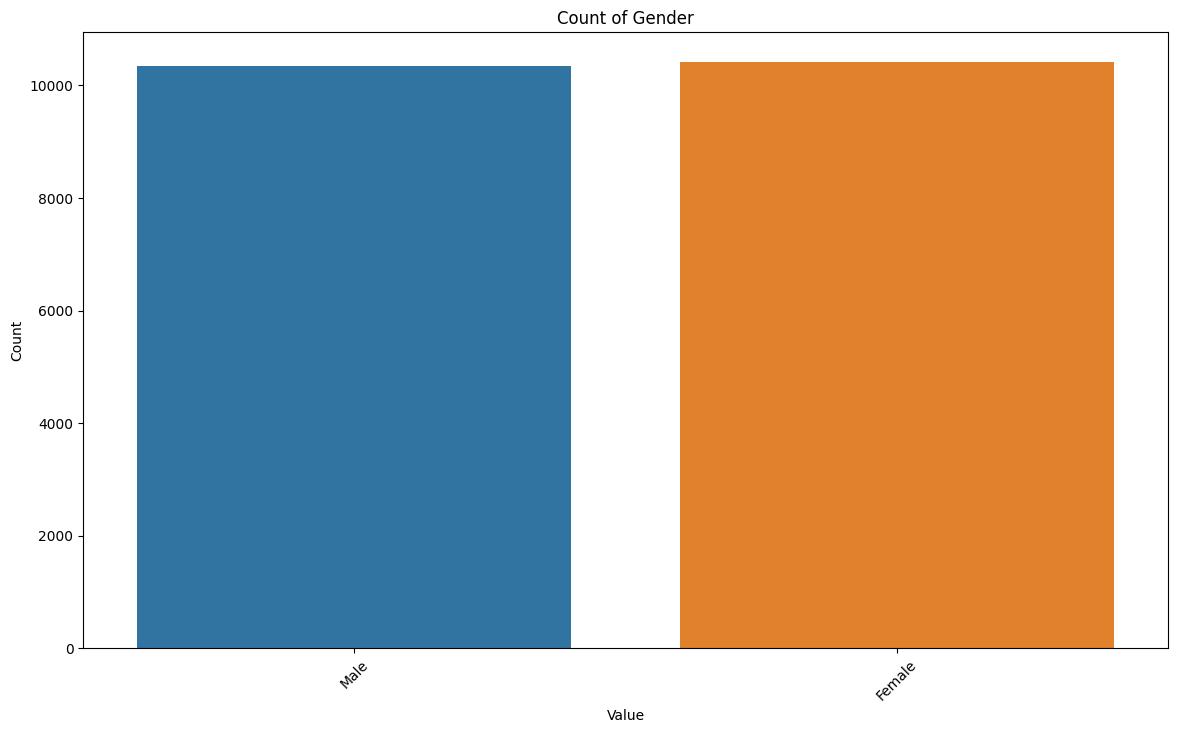

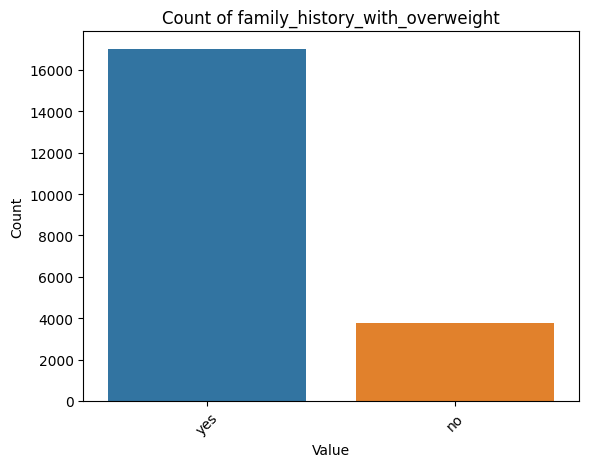

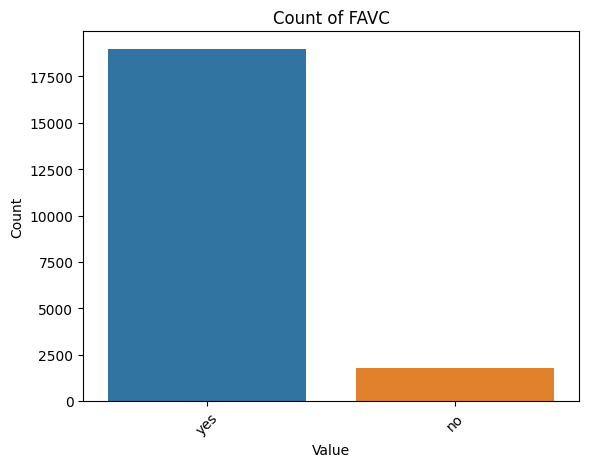

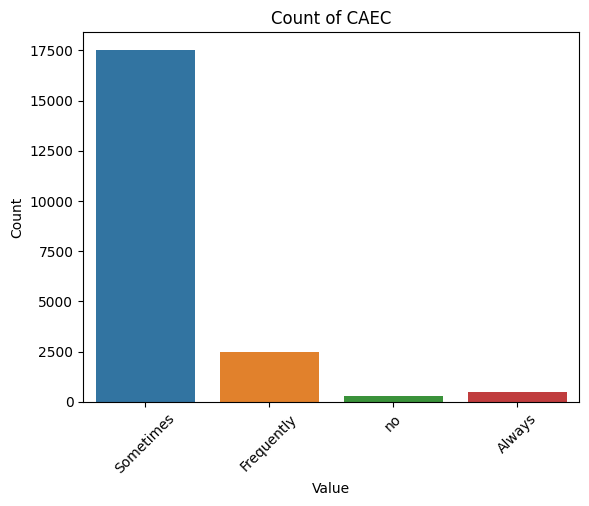

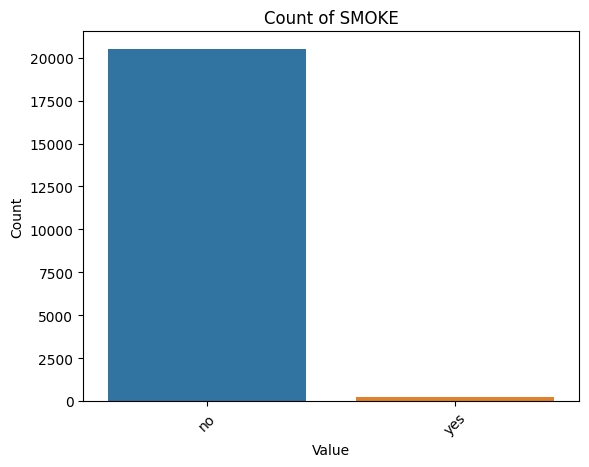

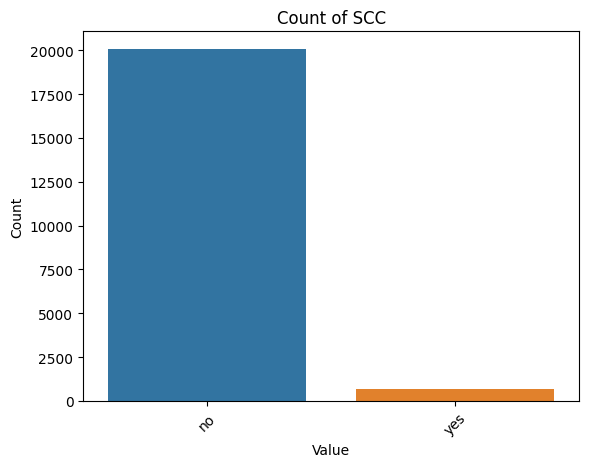

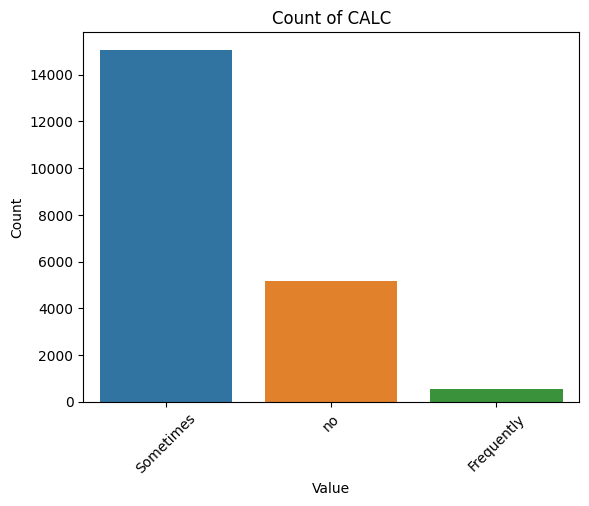

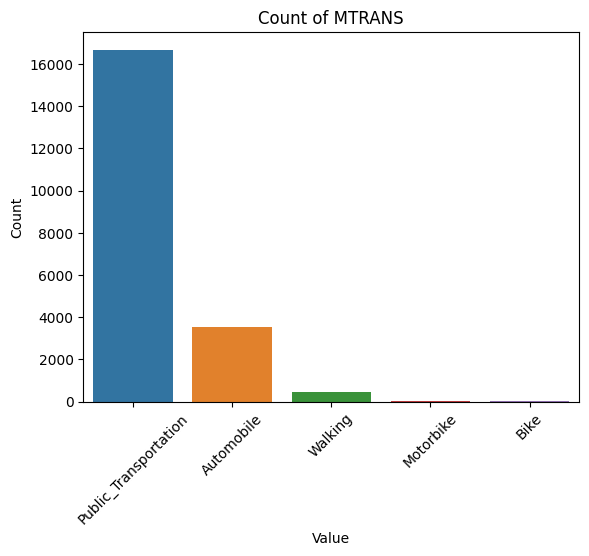

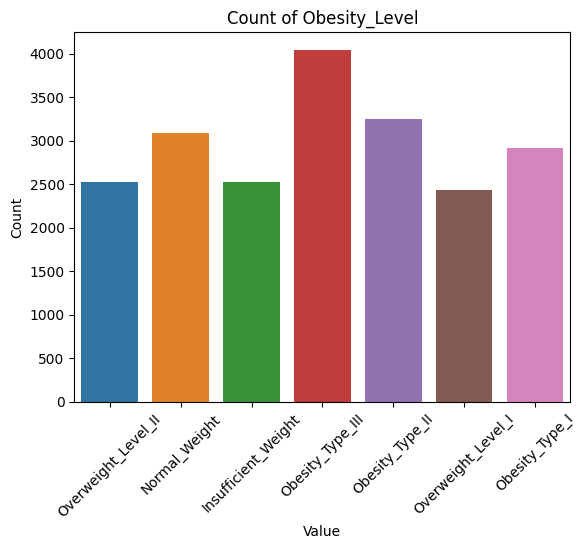

In [16]:
plt.figure(figsize=(14, 8))
for col in categoricals:
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

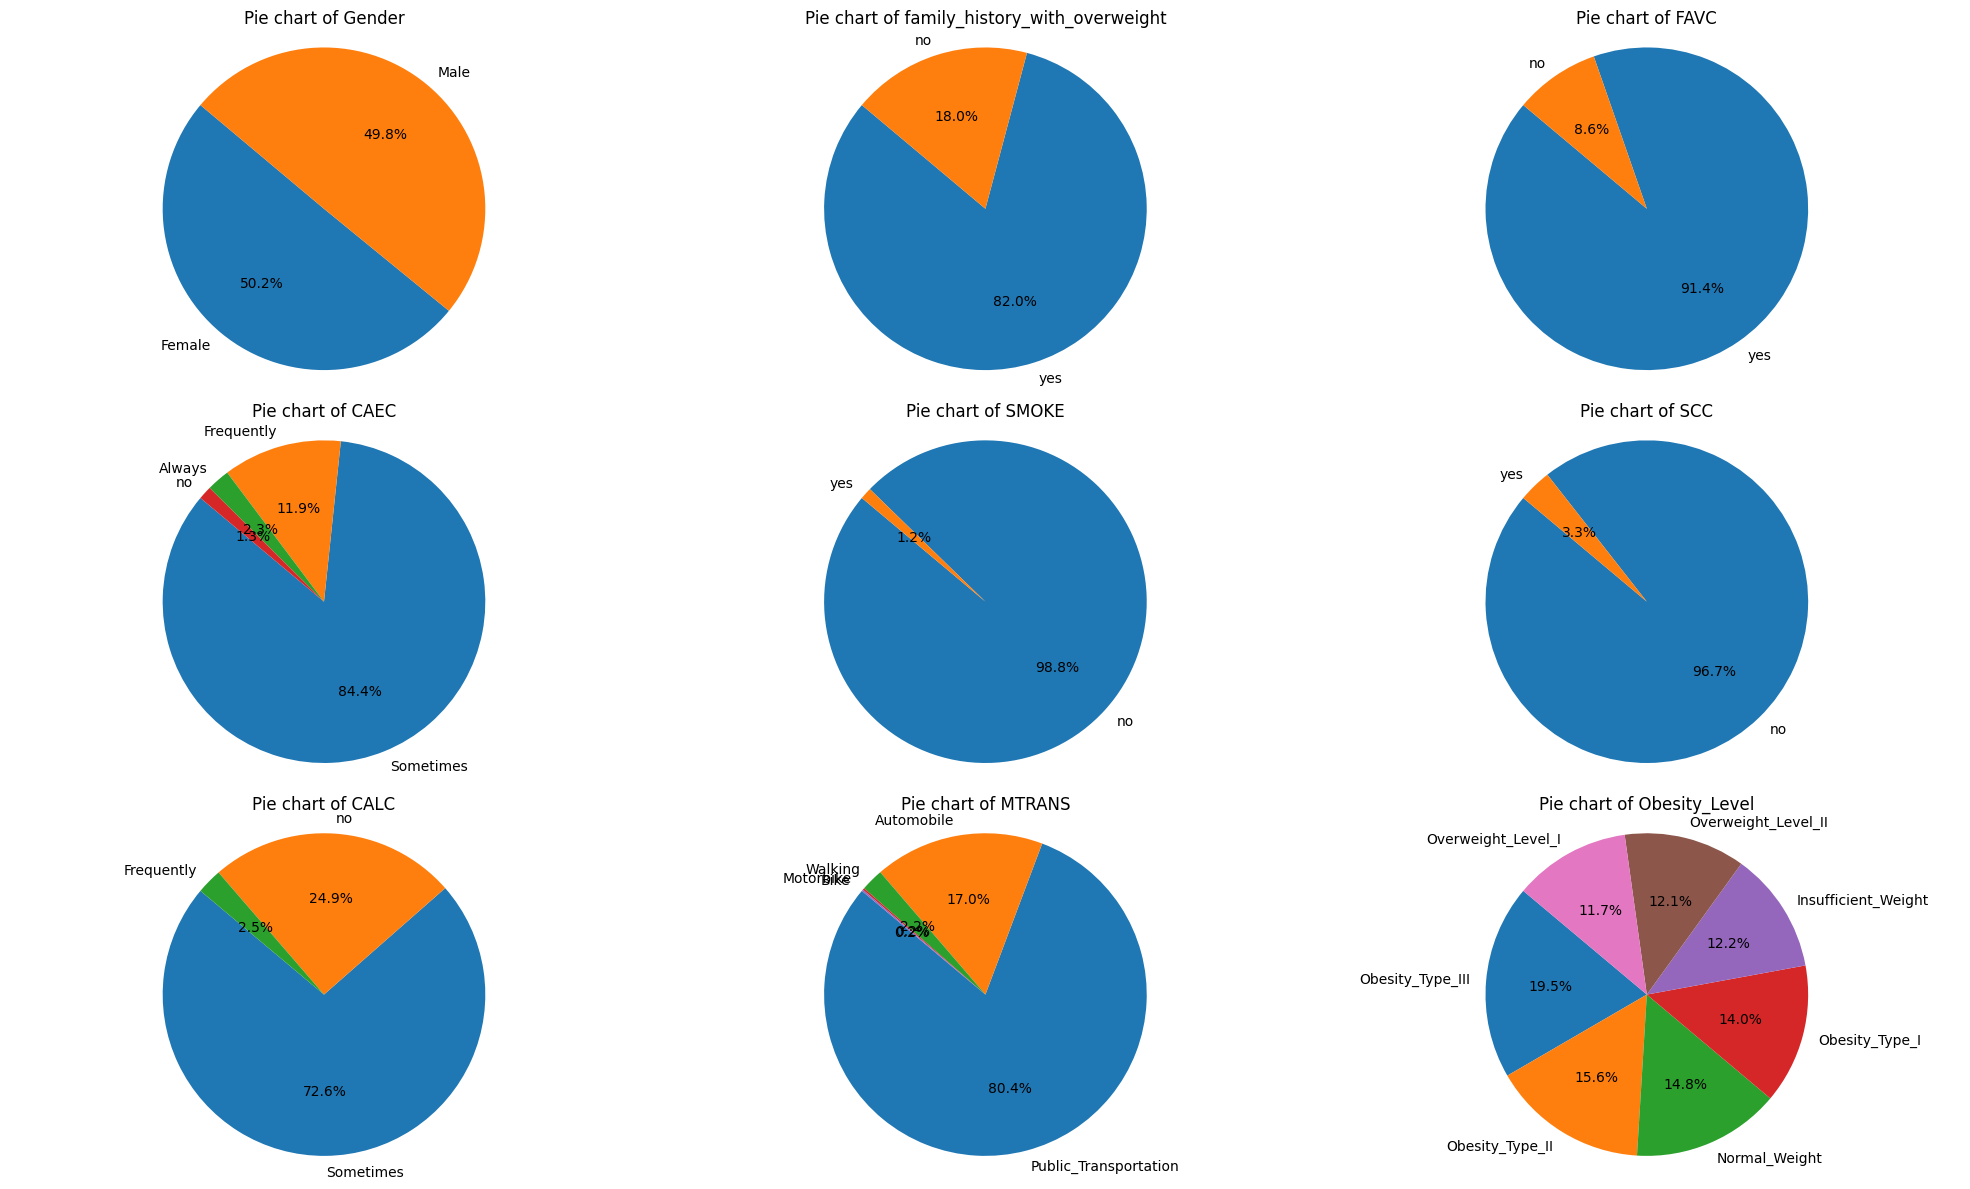

In [17]:
plt.figure(figsize=(20, 12))
for i, col in enumerate(categoricals, 1):
    plt.subplot(3, 3, i)
    counts = df[col].value_counts()
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Pie chart of {col}')
    plt.axis('equal')

plt.tight_layout()
plt.show()

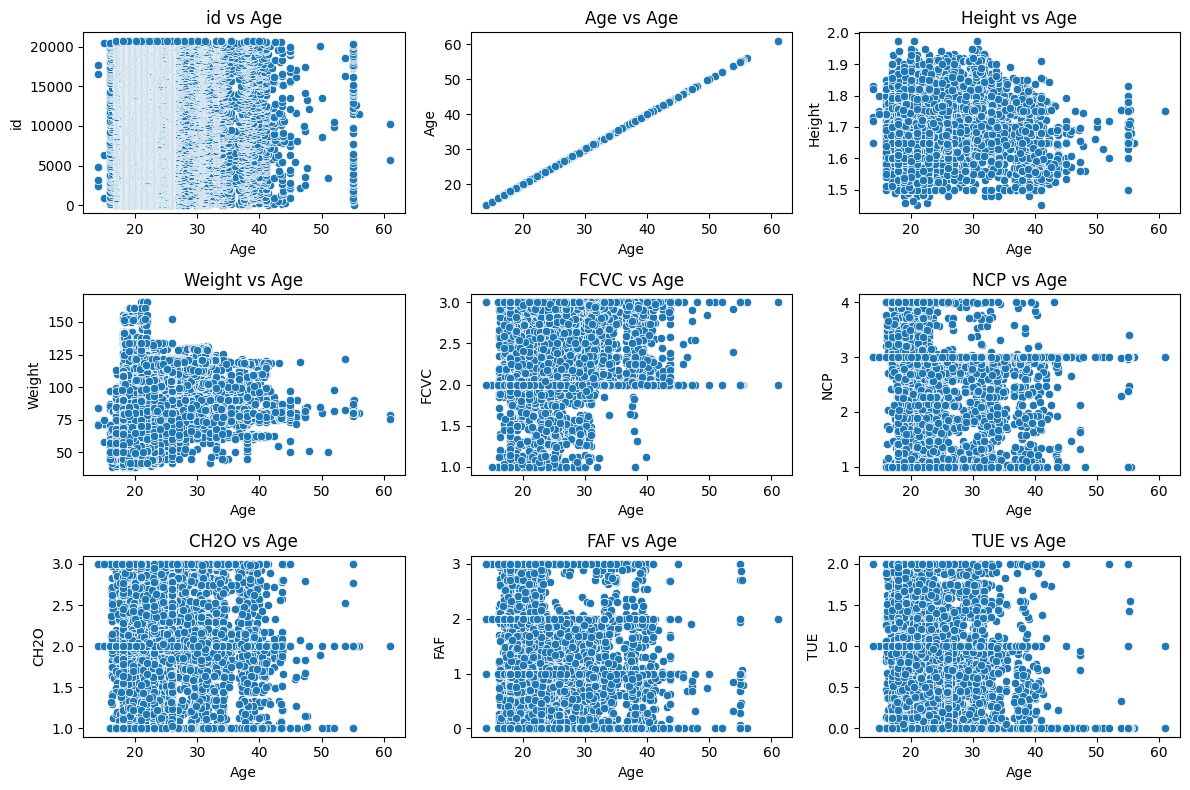

In [18]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numericals, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(data=df, x='Age', y=col)
    plt.title(f'{col} vs Age')
    plt.xlabel('Age')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

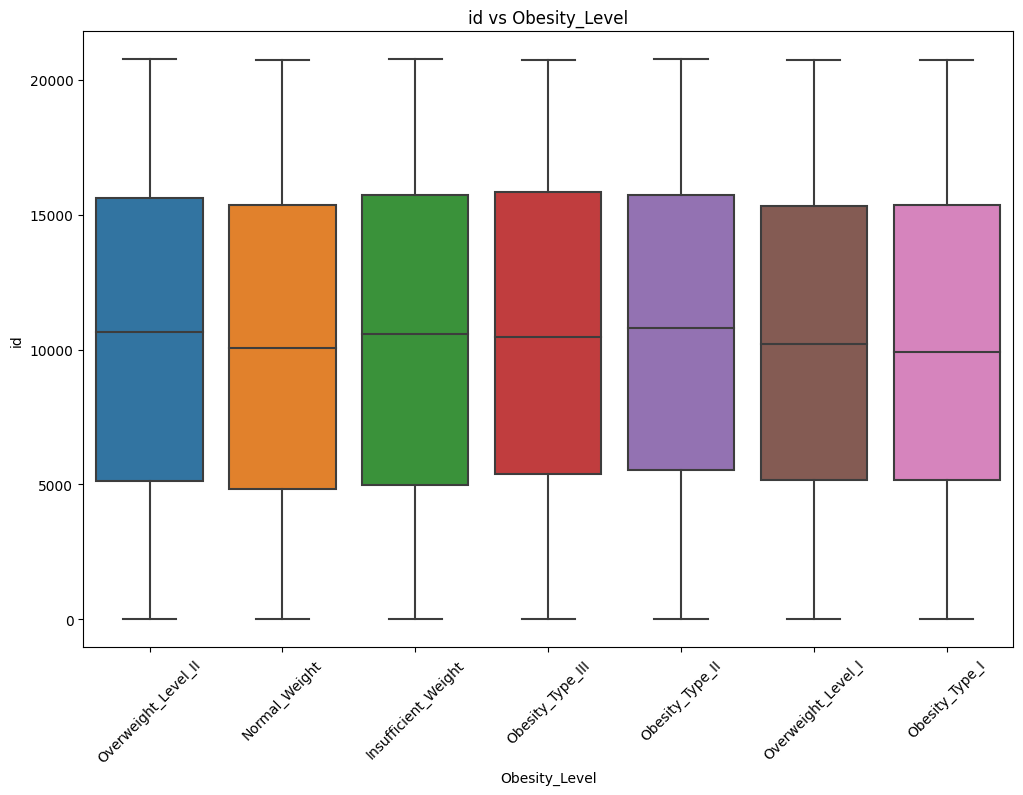

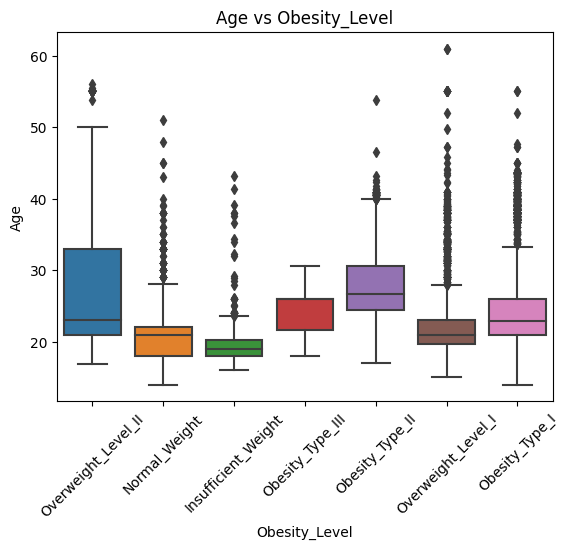

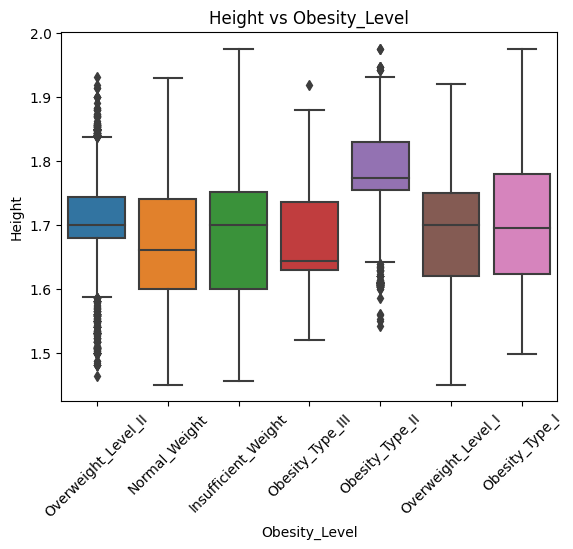

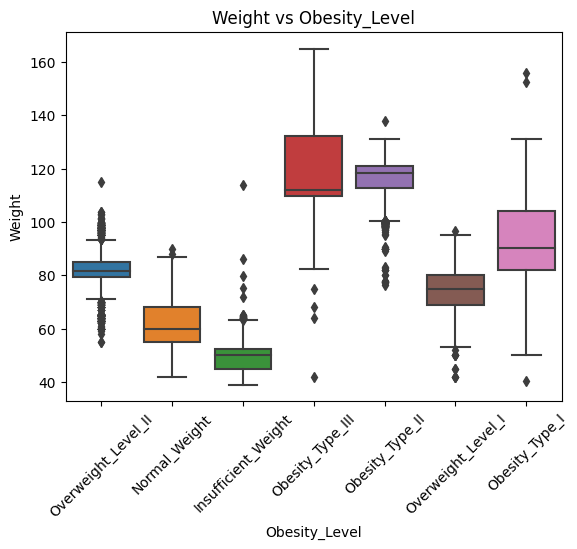

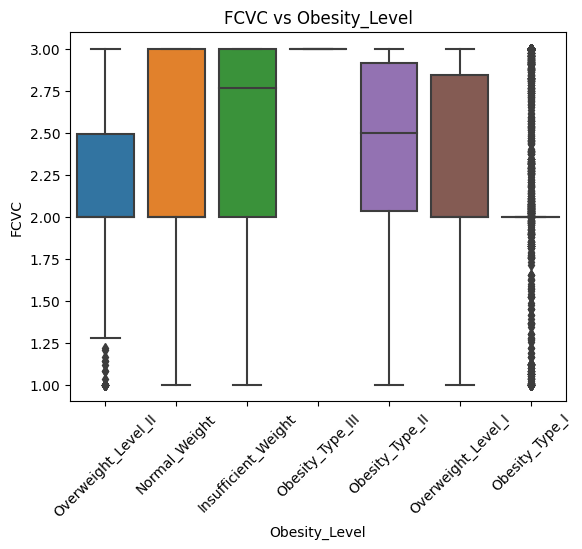

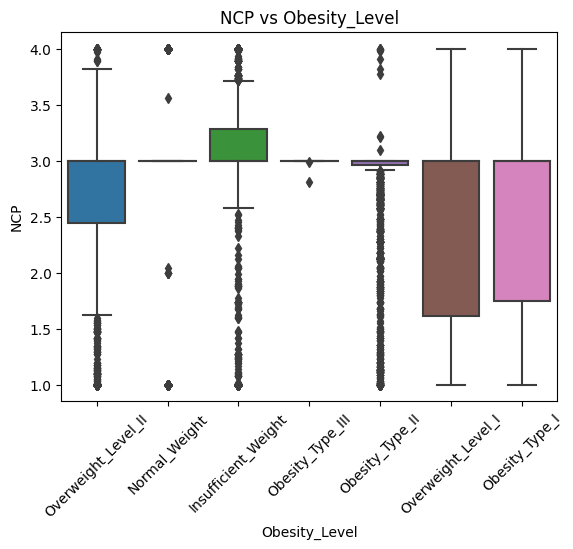

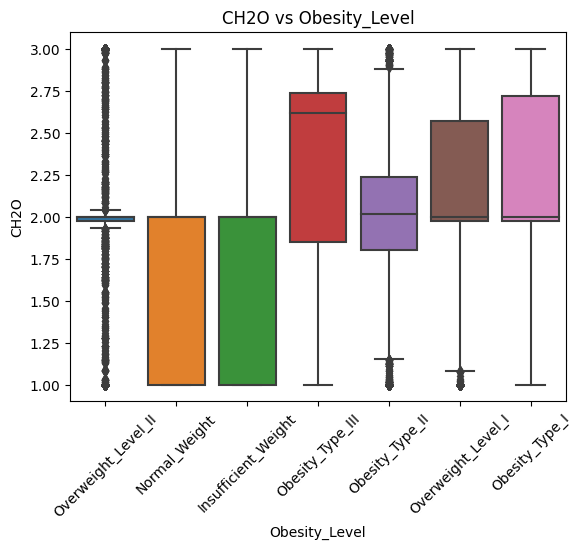

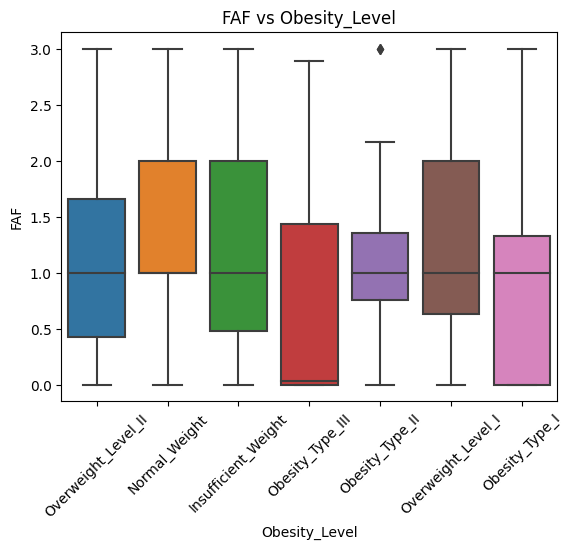

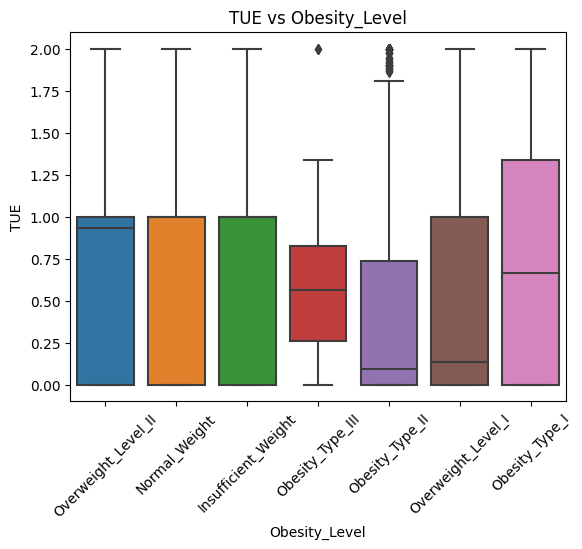

In [19]:
plt.figure(figsize=(12, 8))
for col in numericals:
    sns.boxplot(data=df, x='Obesity_Level', y=col)
    plt.title(f'{col} vs Obesity_Level')
    plt.xlabel('Obesity_Level')
    plt.ylabel(col)
    plt.xticks(rotation=45)
    plt.show()

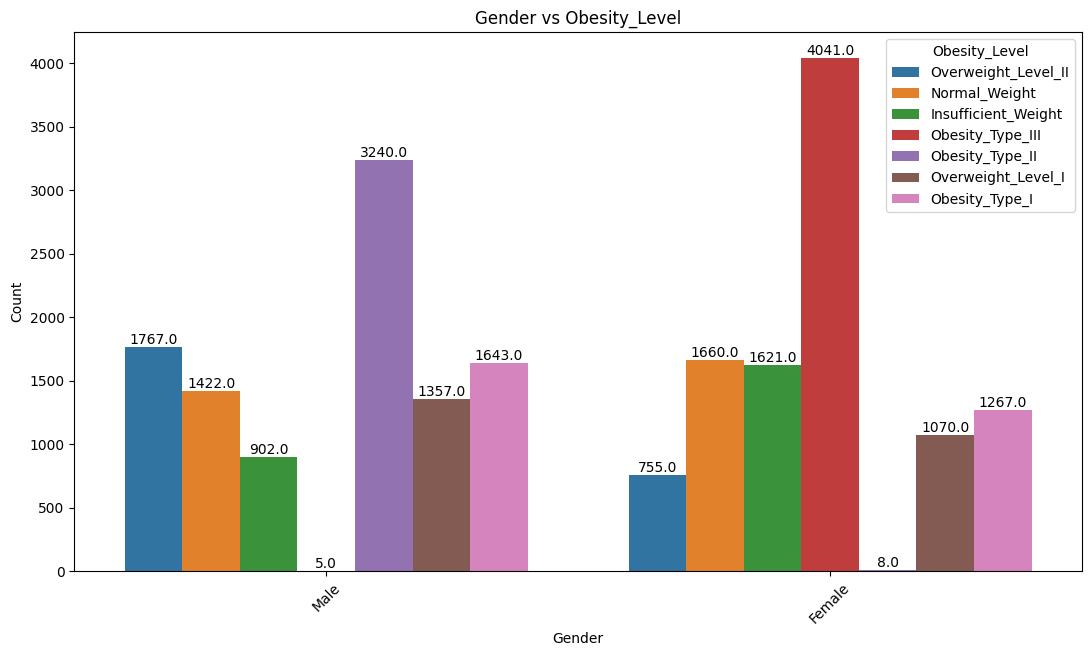

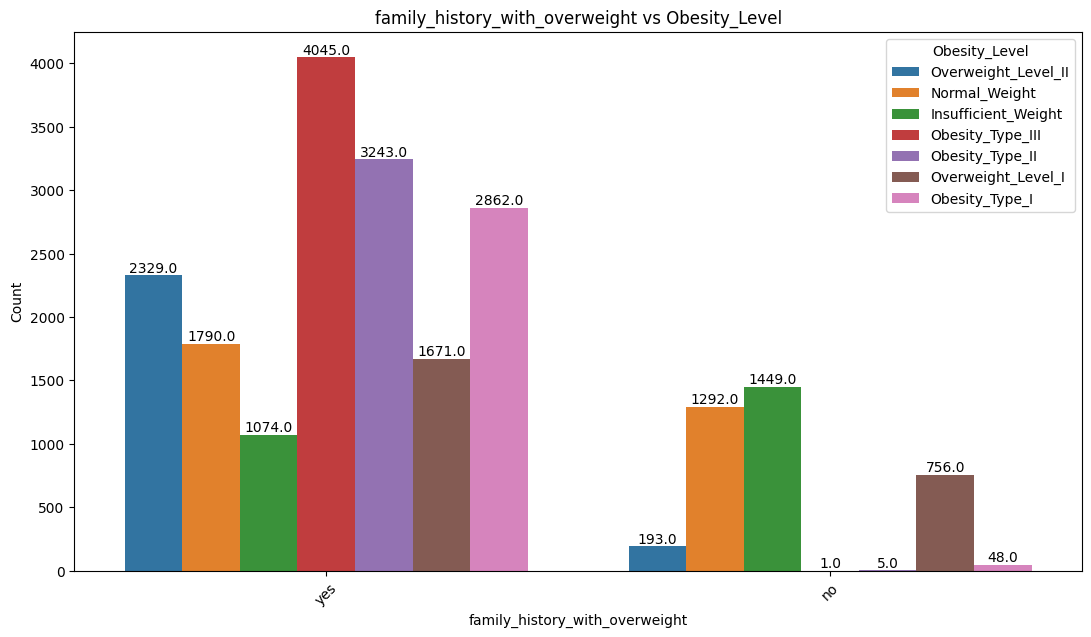

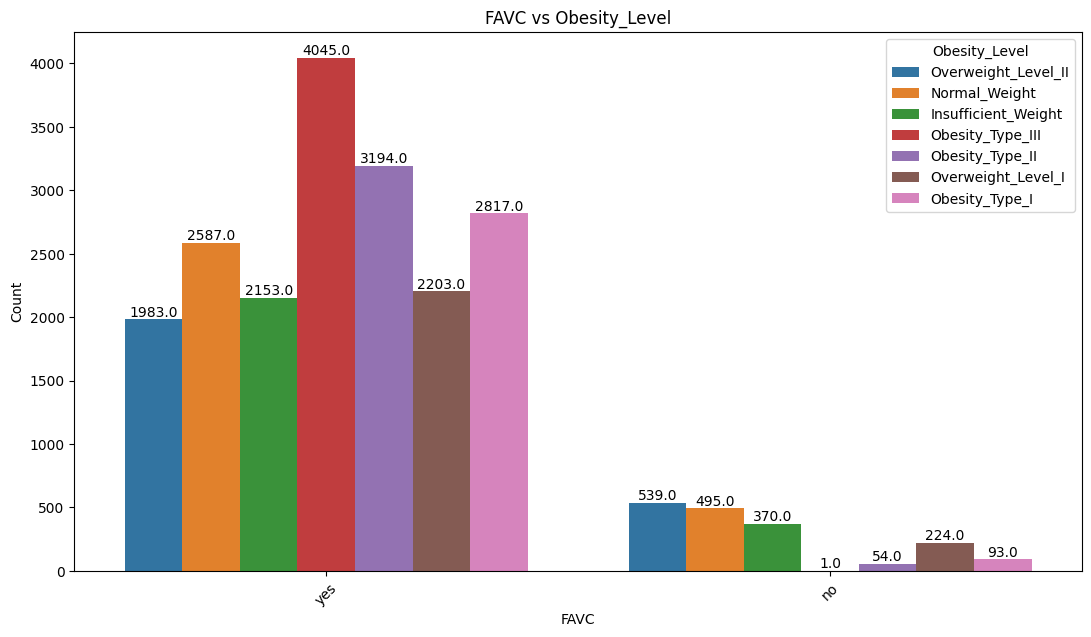

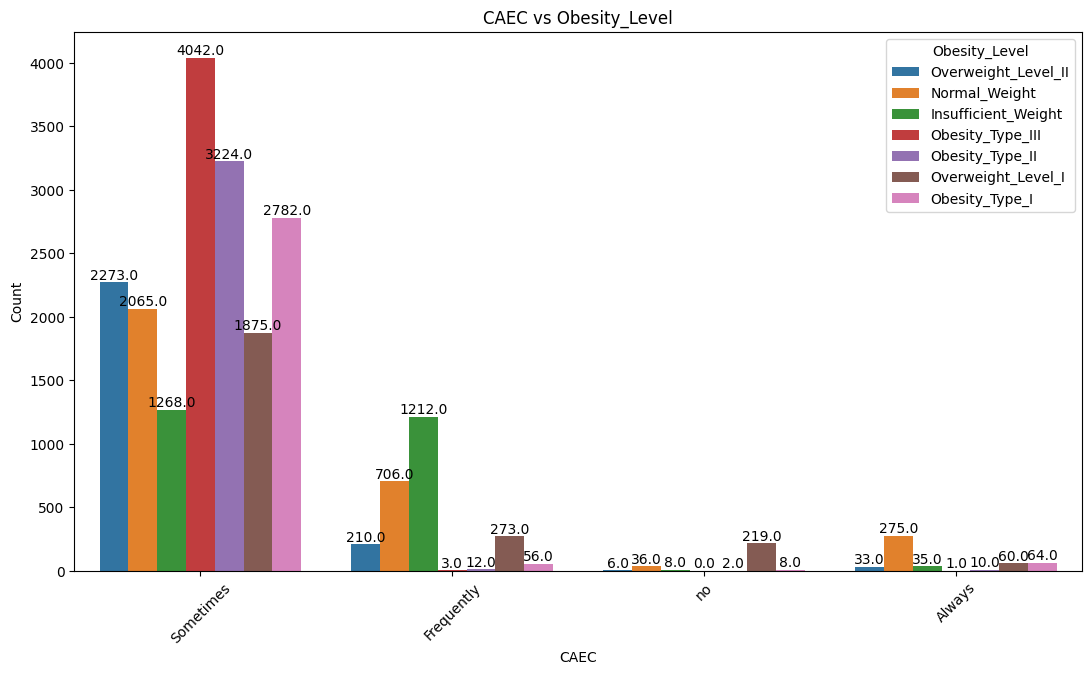

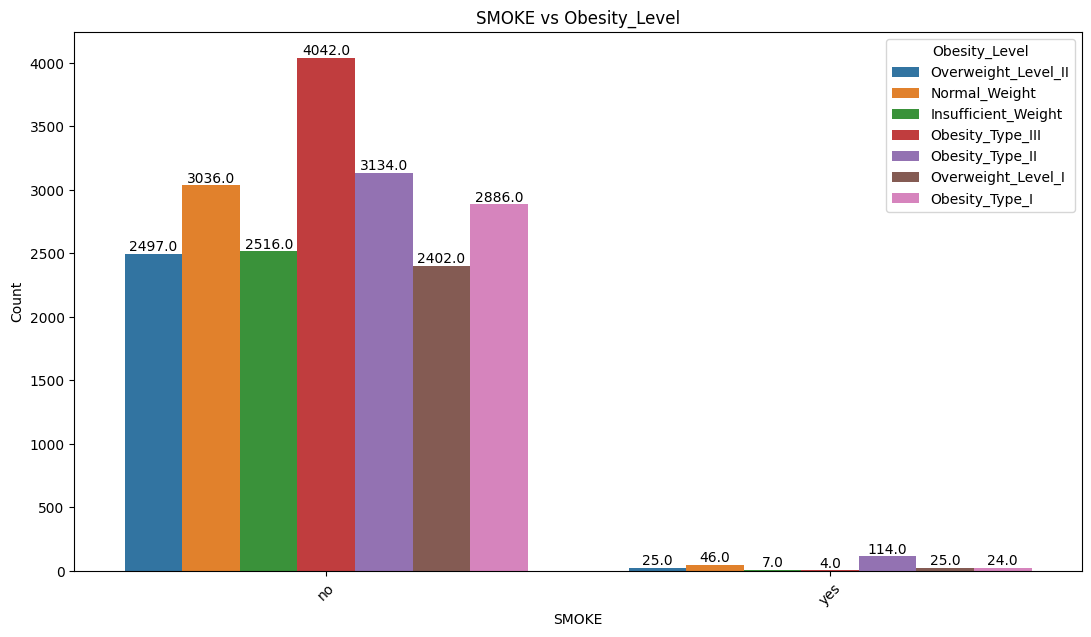

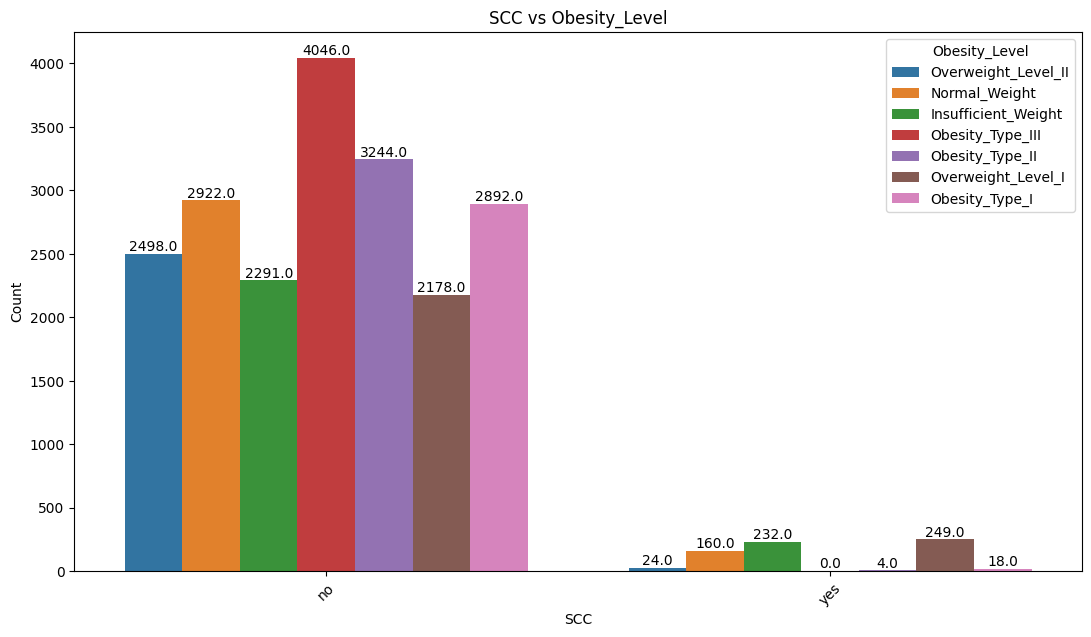

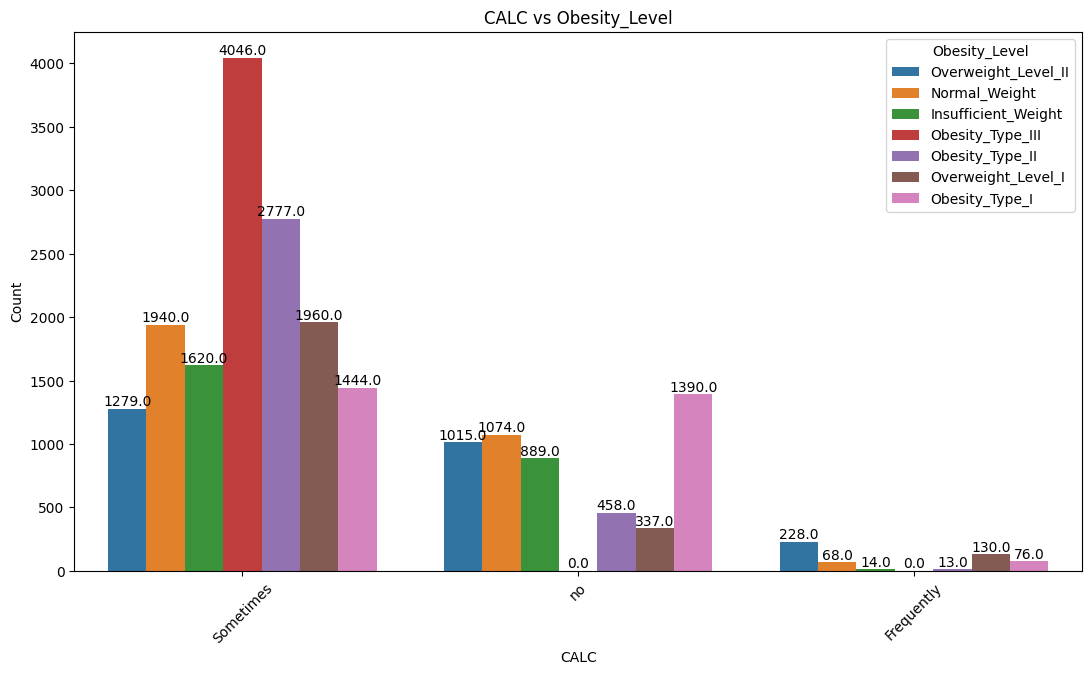

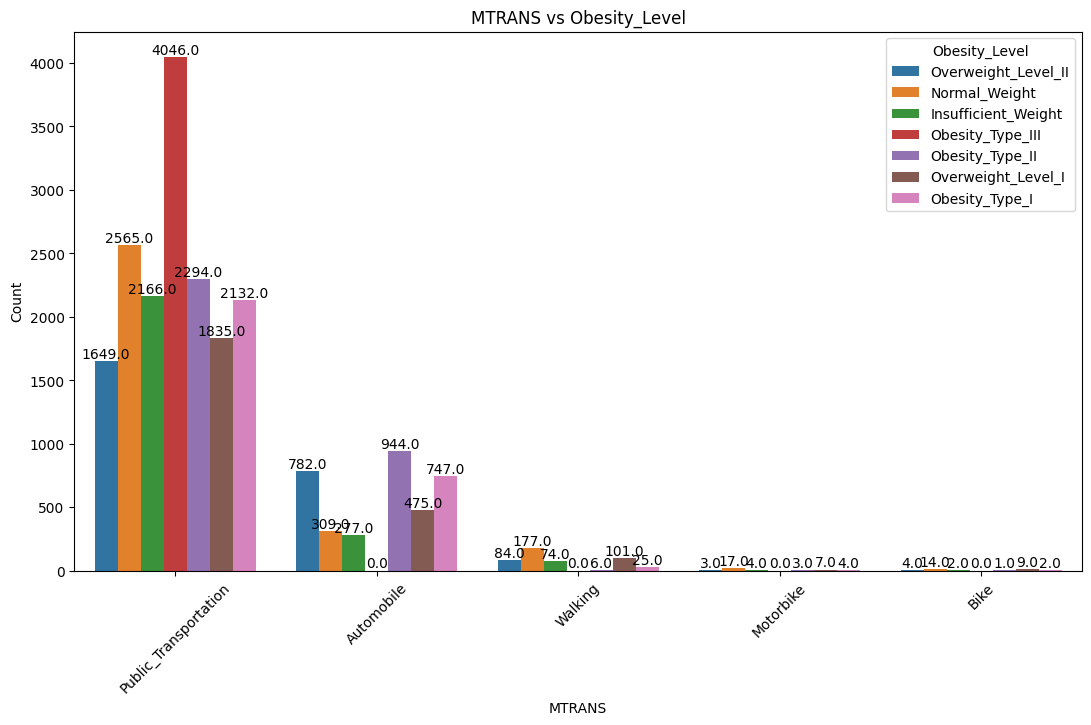

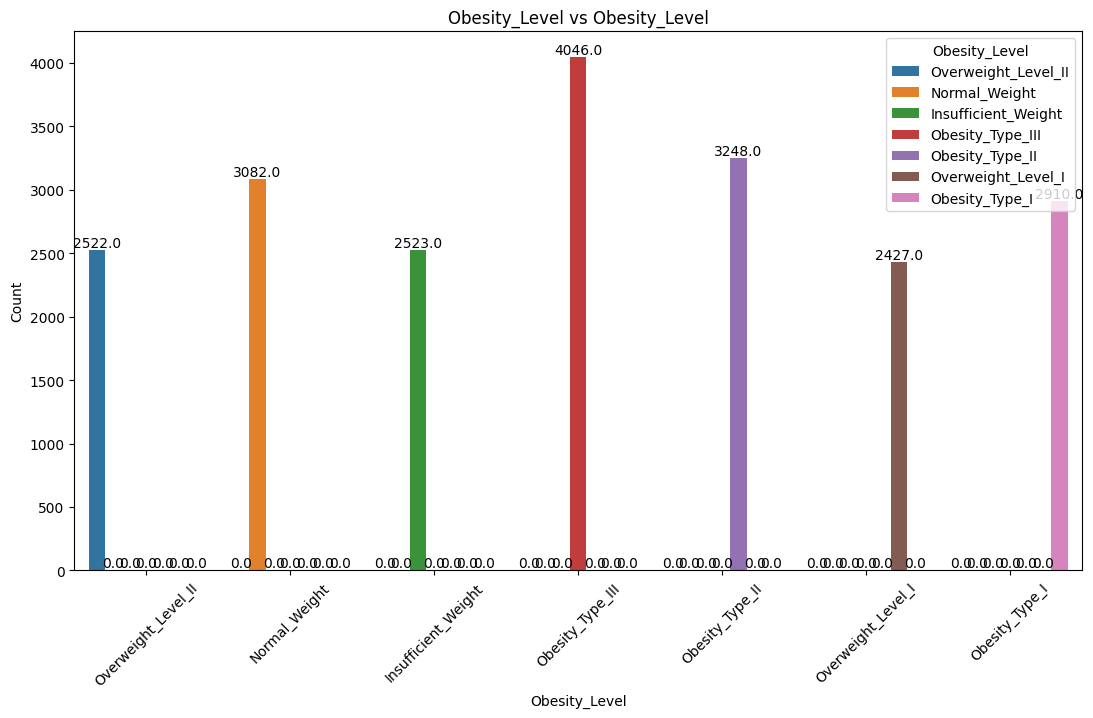

In [20]:
for col in categoricals:
    plt.figure(figsize=(13, 7))
    ax = sns.countplot(data=df, x=col, hue='Obesity_Level')

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width() / 2., height, height, ha='center', va='bottom')

    plt.title(f'{col} vs Obesity_Level')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Obesity_Level')
    plt.show()

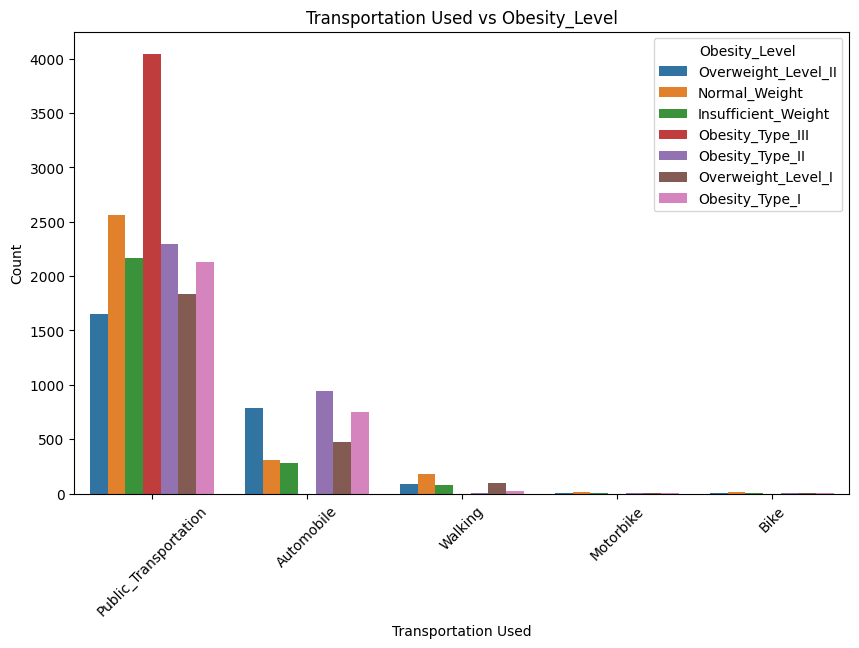

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='MTRANS', hue='Obesity_Level')
plt.title('Transportation Used vs Obesity_Level')
plt.xlabel('Transportation Used')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Obesity_Level')
plt.show()

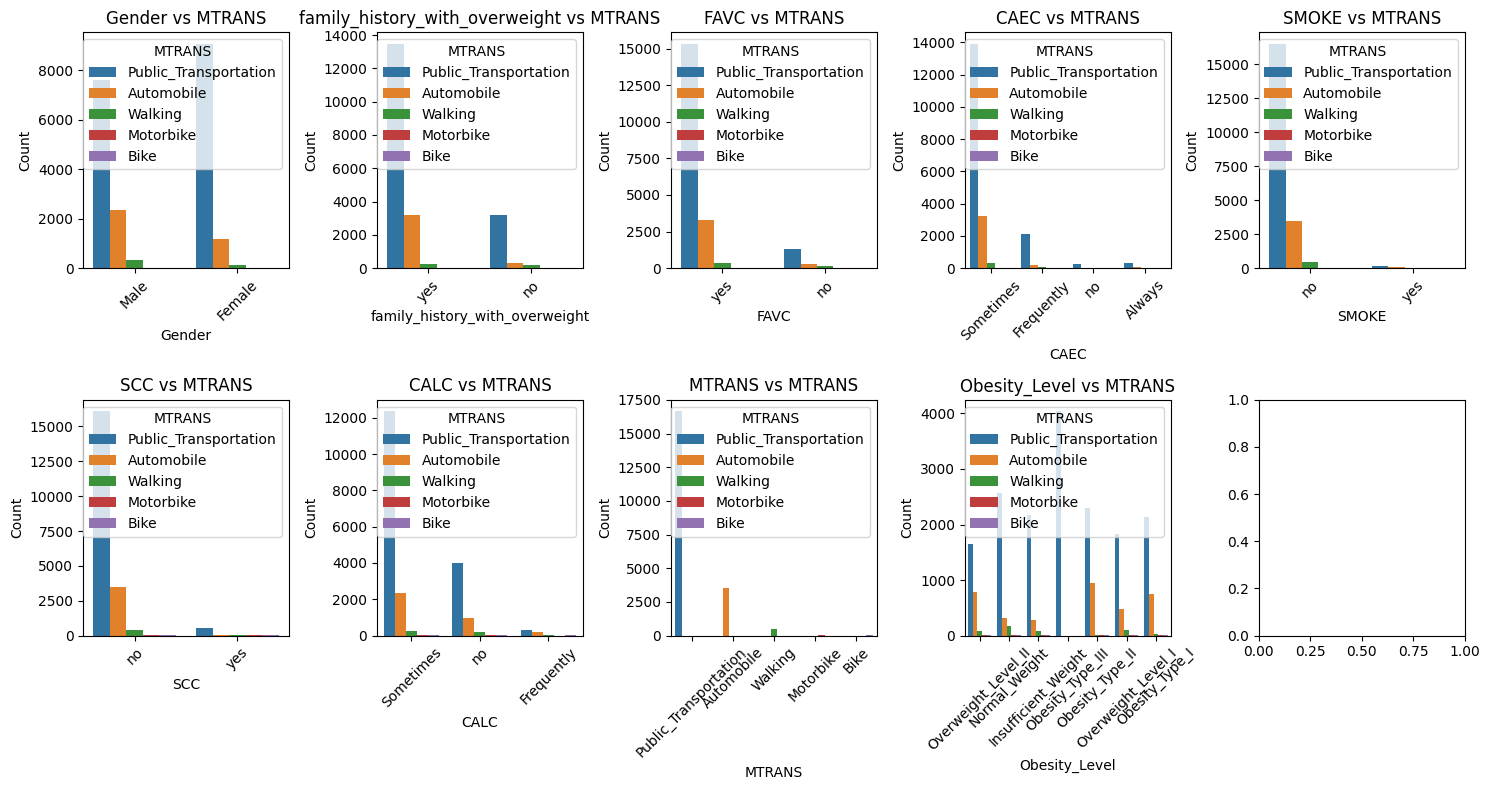

In [22]:
num_categoricals = len(categoricals)
num_subplots = num_categoricals + 1 

plt.figure(figsize=(15, 8))

# Plot count plots for categorical variables
for i, col in enumerate(categoricals, 1):
    plt.subplot(2, num_subplots // 2, i)
    sns.countplot(data=df, x=col, hue='MTRANS')
    plt.title(f'{col} vs MTRANS')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='MTRANS')

# Empty subplot for numerical plots
plt.subplot(2, num_subplots // 2, num_subplots)

plt.tight_layout()
plt.show()

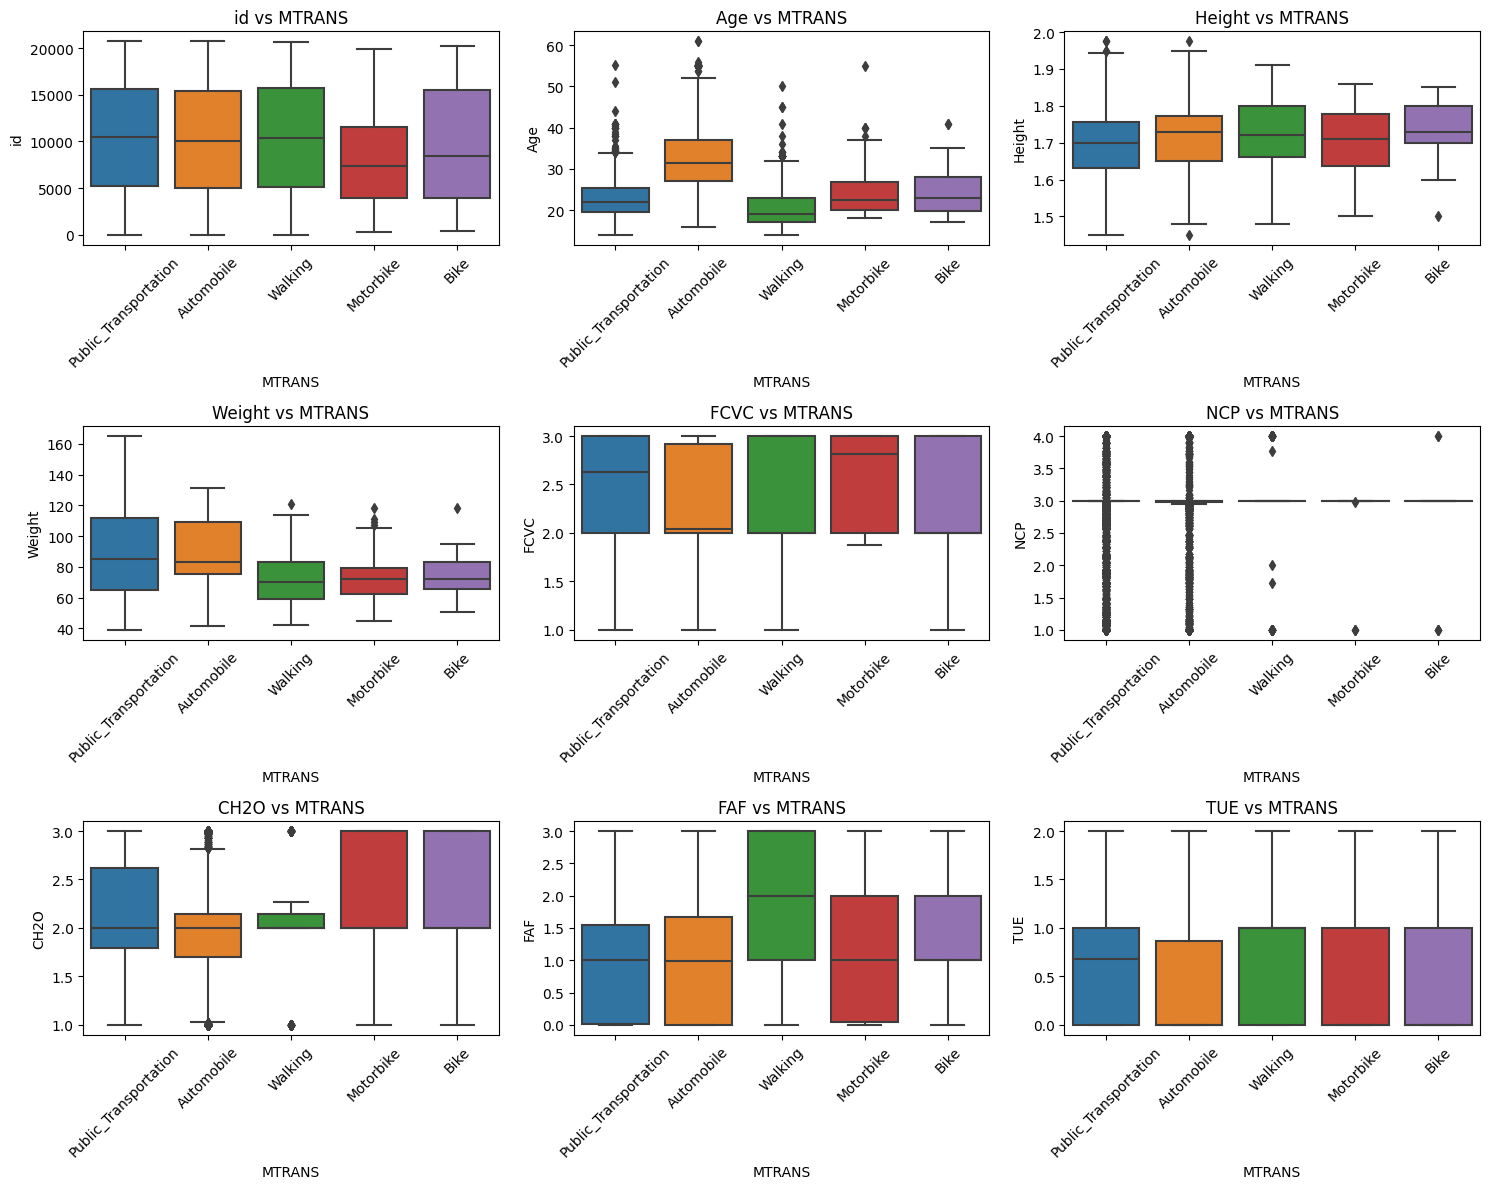

In [23]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(numericals, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x='MTRANS', y=col)
    plt.title(f'{col} vs MTRANS')
    plt.xlabel('MTRANS')
    plt.ylabel(col)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

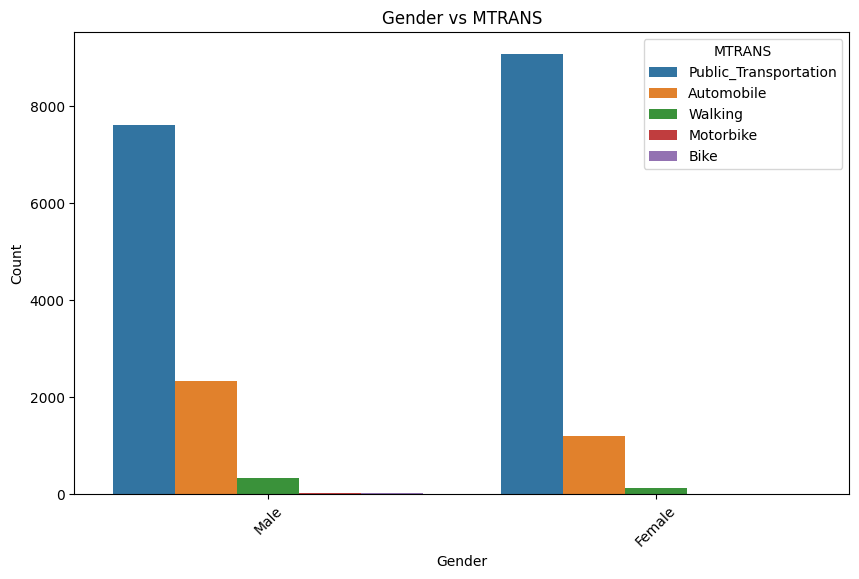

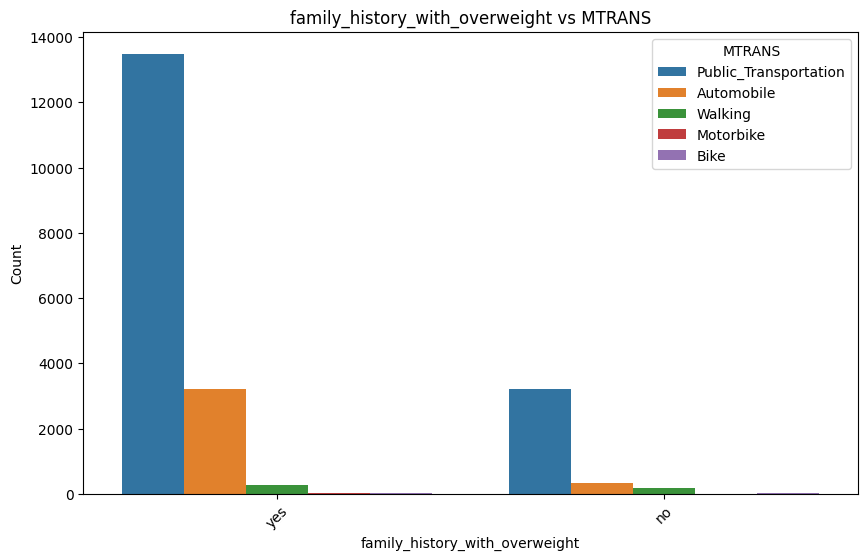

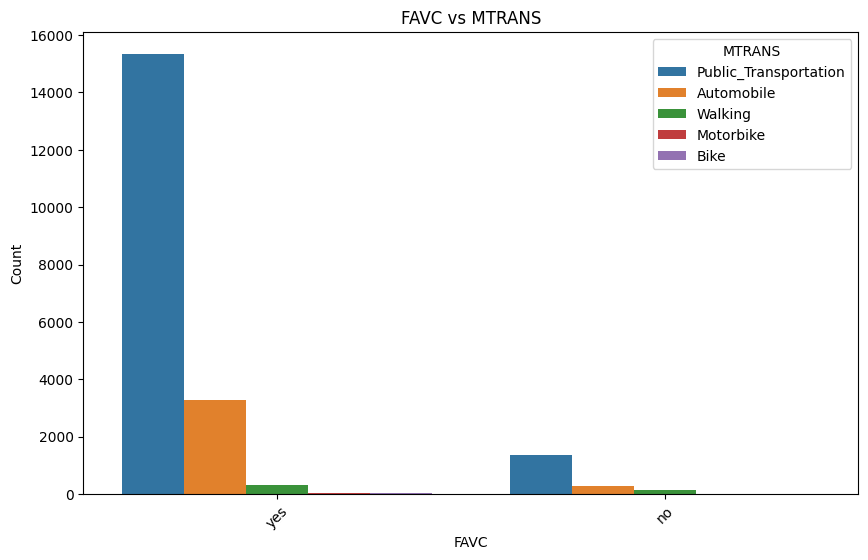

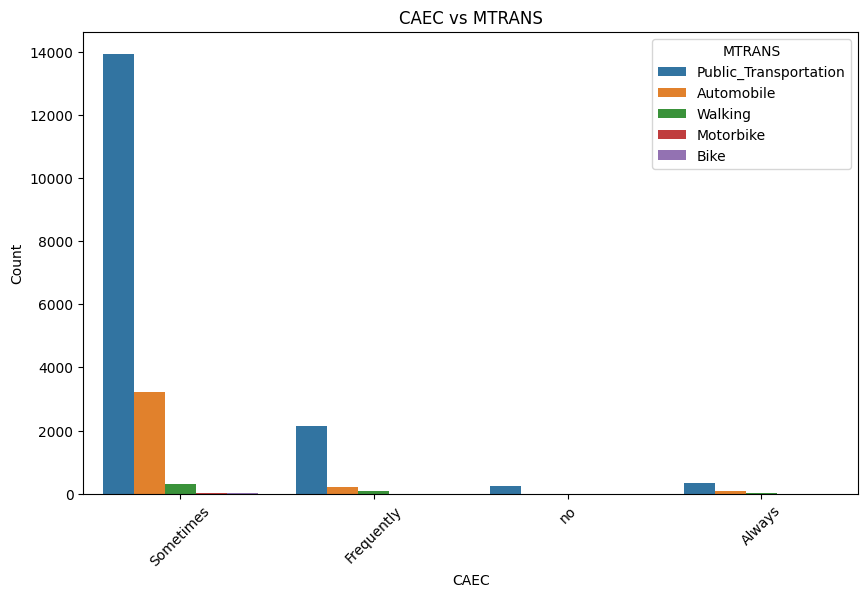

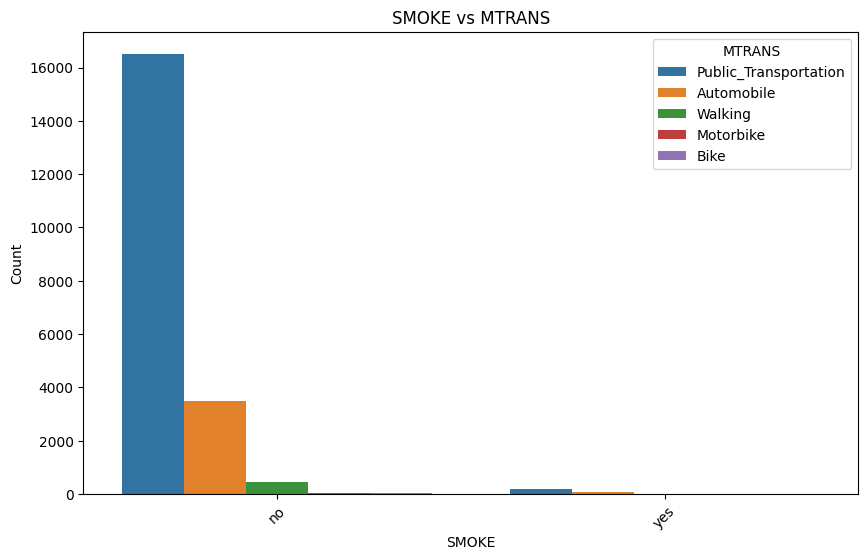

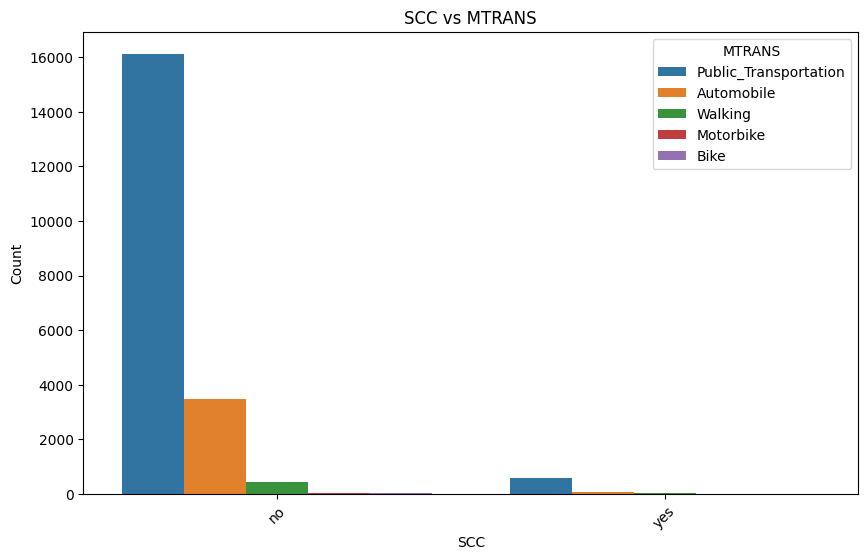

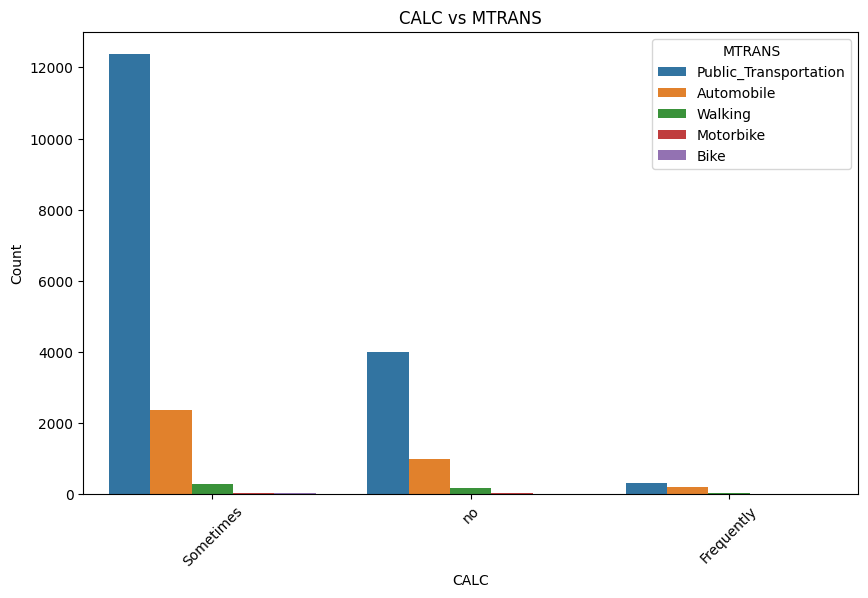

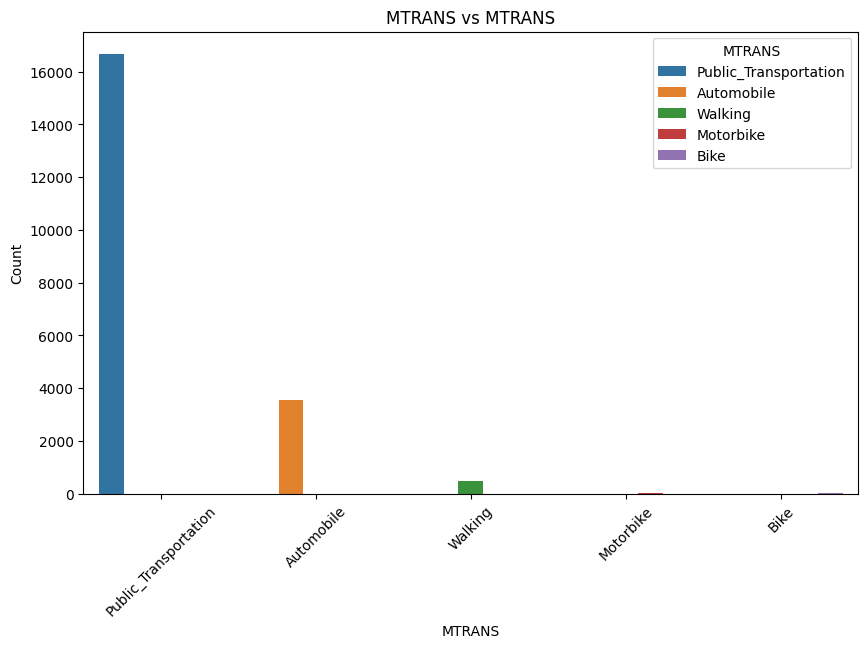

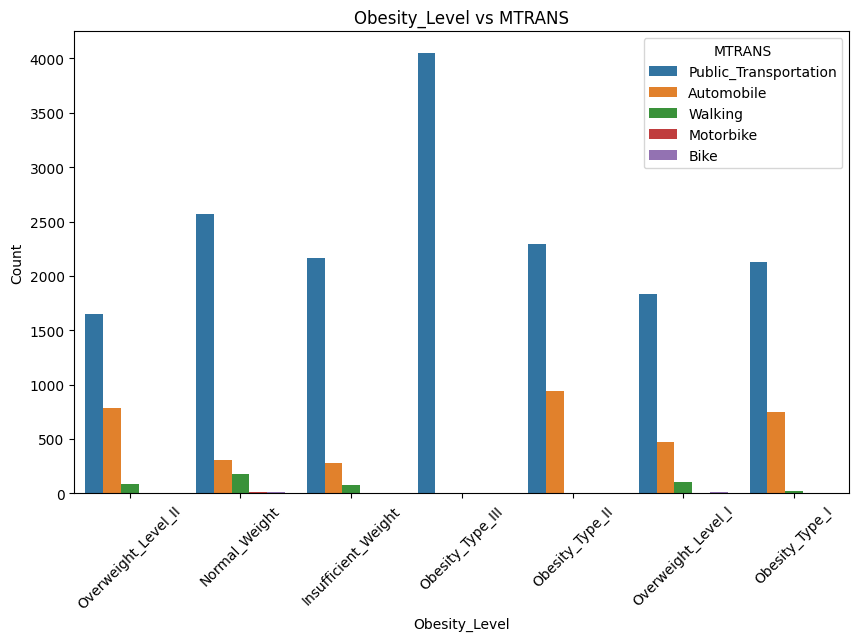

In [24]:
for col in categoricals:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue='MTRANS')
    plt.title(f'{col} vs MTRANS')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='MTRANS')
    plt.show()

# **ENCODING**

In [25]:
df_test.shape

(13840, 17)

In [26]:
categoricals = ["Gender", "family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC", "CALC", "MTRANS" ]


In [27]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numerical_features = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
categorical_features = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']

numerical_pipeline = Pipeline([('scaler', StandardScaler())])

categorical_pipeline = Pipeline([
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))])

preprocessor = ColumnTransformer([
    ('numerical', numerical_pipeline, numericals),
    ('categorical', categorical_pipeline, categoricals)
])

In [28]:
df['Obesity_Level'] = df['Obesity_Level'].replace({'Insufficient_Weight':0,
                                                            'Normal_Weight':1,
                                                            'Overweight_Level_I':2,
                                                            'Overweight_Level_II':3,
                                                            'Obesity_Type_I':4,
                                                            'Obesity_Type_II':5,
                                                            'Obesity_Type_III':6})

In [29]:
x_train = df.drop('Obesity_Level', axis=1)
y_train = df['Obesity_Level']

x_test = df_test

x_train_encoded = preprocessor.fit_transform(x_train)
x_test_encoded = preprocessor.transform(x_test)

x_train_encoded_split, x_val_encoded, y_train_split, y_val = train_test_split(x_train_encoded, y_train, test_size=0.2, random_state=42)

In [30]:
from sklearn.metrics import accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(x_train_encoded_split, y_train_split)
y_val_pred = model.predict(x_val_encoded)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f'Validation Accuracy: {val_accuracy:.4f}')
y_test_pred = model.predict(x_test_encoded)

Validation Accuracy: 0.8601


In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'])

LabelEncoder()

In [32]:
y_pred_test = model.predict(x_test_encoded)
y_pred_test_labels = le.inverse_transform(y_pred_test)

submission = pd.DataFrame({'id': df_test['id'], 'Obesity_Level': y_pred_test_labels})
submission.to_csv('submission.csv', index=False)
submission.head()

,id,Obesity_Level
0,20758,Overweight_Level_I
1,20759,Obesity_Type_I
2,20760,Overweight_Level_II
3,20761,Obesity_Type_III
4,20762,Overweight_Level_II
